In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

To address this question you might start by visualising the distribution of Munro heights and frequency of them being climbed. Are there any obvious outliers in the data, and can you think why this might be the case? Does it look as though there is there a statistically significant relationship between height and frequency of climb? How much can we trust the conclusions given the nature of the data?

In [2]:
df = pd.read_csv('datasets/clean.csv')
df.columns

Index(['name', 'altitude', 'ascent_count', 'rating', 'region', 'report_count',
       'rating_count', 'bb_count', 'hotel_count', 'hostel_count',
       'cottage_count', 'camping_count', 'island', 'county', 'latitude',
       'longitude', 'neighbor_count_1', 'neighbor_count_2.5',
       'neighbor_count_5', 'neighbor_count_10', 'neighbor_count_15',
       'neighbor_count_20', 'nearest_city_dist', 'nearest_city_population',
       'nearest_large_city_dist', 'population_25', 'population_50',
       'population_75', 'population_100'],
      dtype='object')

In [3]:
df.head()

,name,altitude,ascent_count,rating,region,report_count,rating_count,bb_count,hotel_count,hostel_count,...,neighbor_count_10,neighbor_count_15,neighbor_count_20,nearest_city_dist,nearest_city_population,nearest_large_city_dist,population_25,population_50,population_75,population_100
0,Ben Nevis,1345,17902,3.84,Fort William,316,253,72,41,18,...,16,20,29,6.68,10459,89.19,10459,10459,19034,242223
1,Ben Macdui,1309,10449,3.78,Cairngorms,215,162,37,29,9,...,14,17,20,56.26,70000,56.26,0,0,158093,762982
2,Braeriach,1296,6035,3.95,Cairngorms,141,94,37,29,9,...,12,16,20,53.49,70000,53.49,0,0,150894,762982
3,Cairn Toul,1291,5121,3.86,Cairngorms,136,83,37,29,9,...,14,18,21,56.30,70000,56.30,0,0,205053,771982
4,Sgor an Lochain Uaine,1258,4832,3.83,Cairngorms,139,79,37,29,9,...,13,18,20,55.43,70000,55.43,0,0,158093,771982


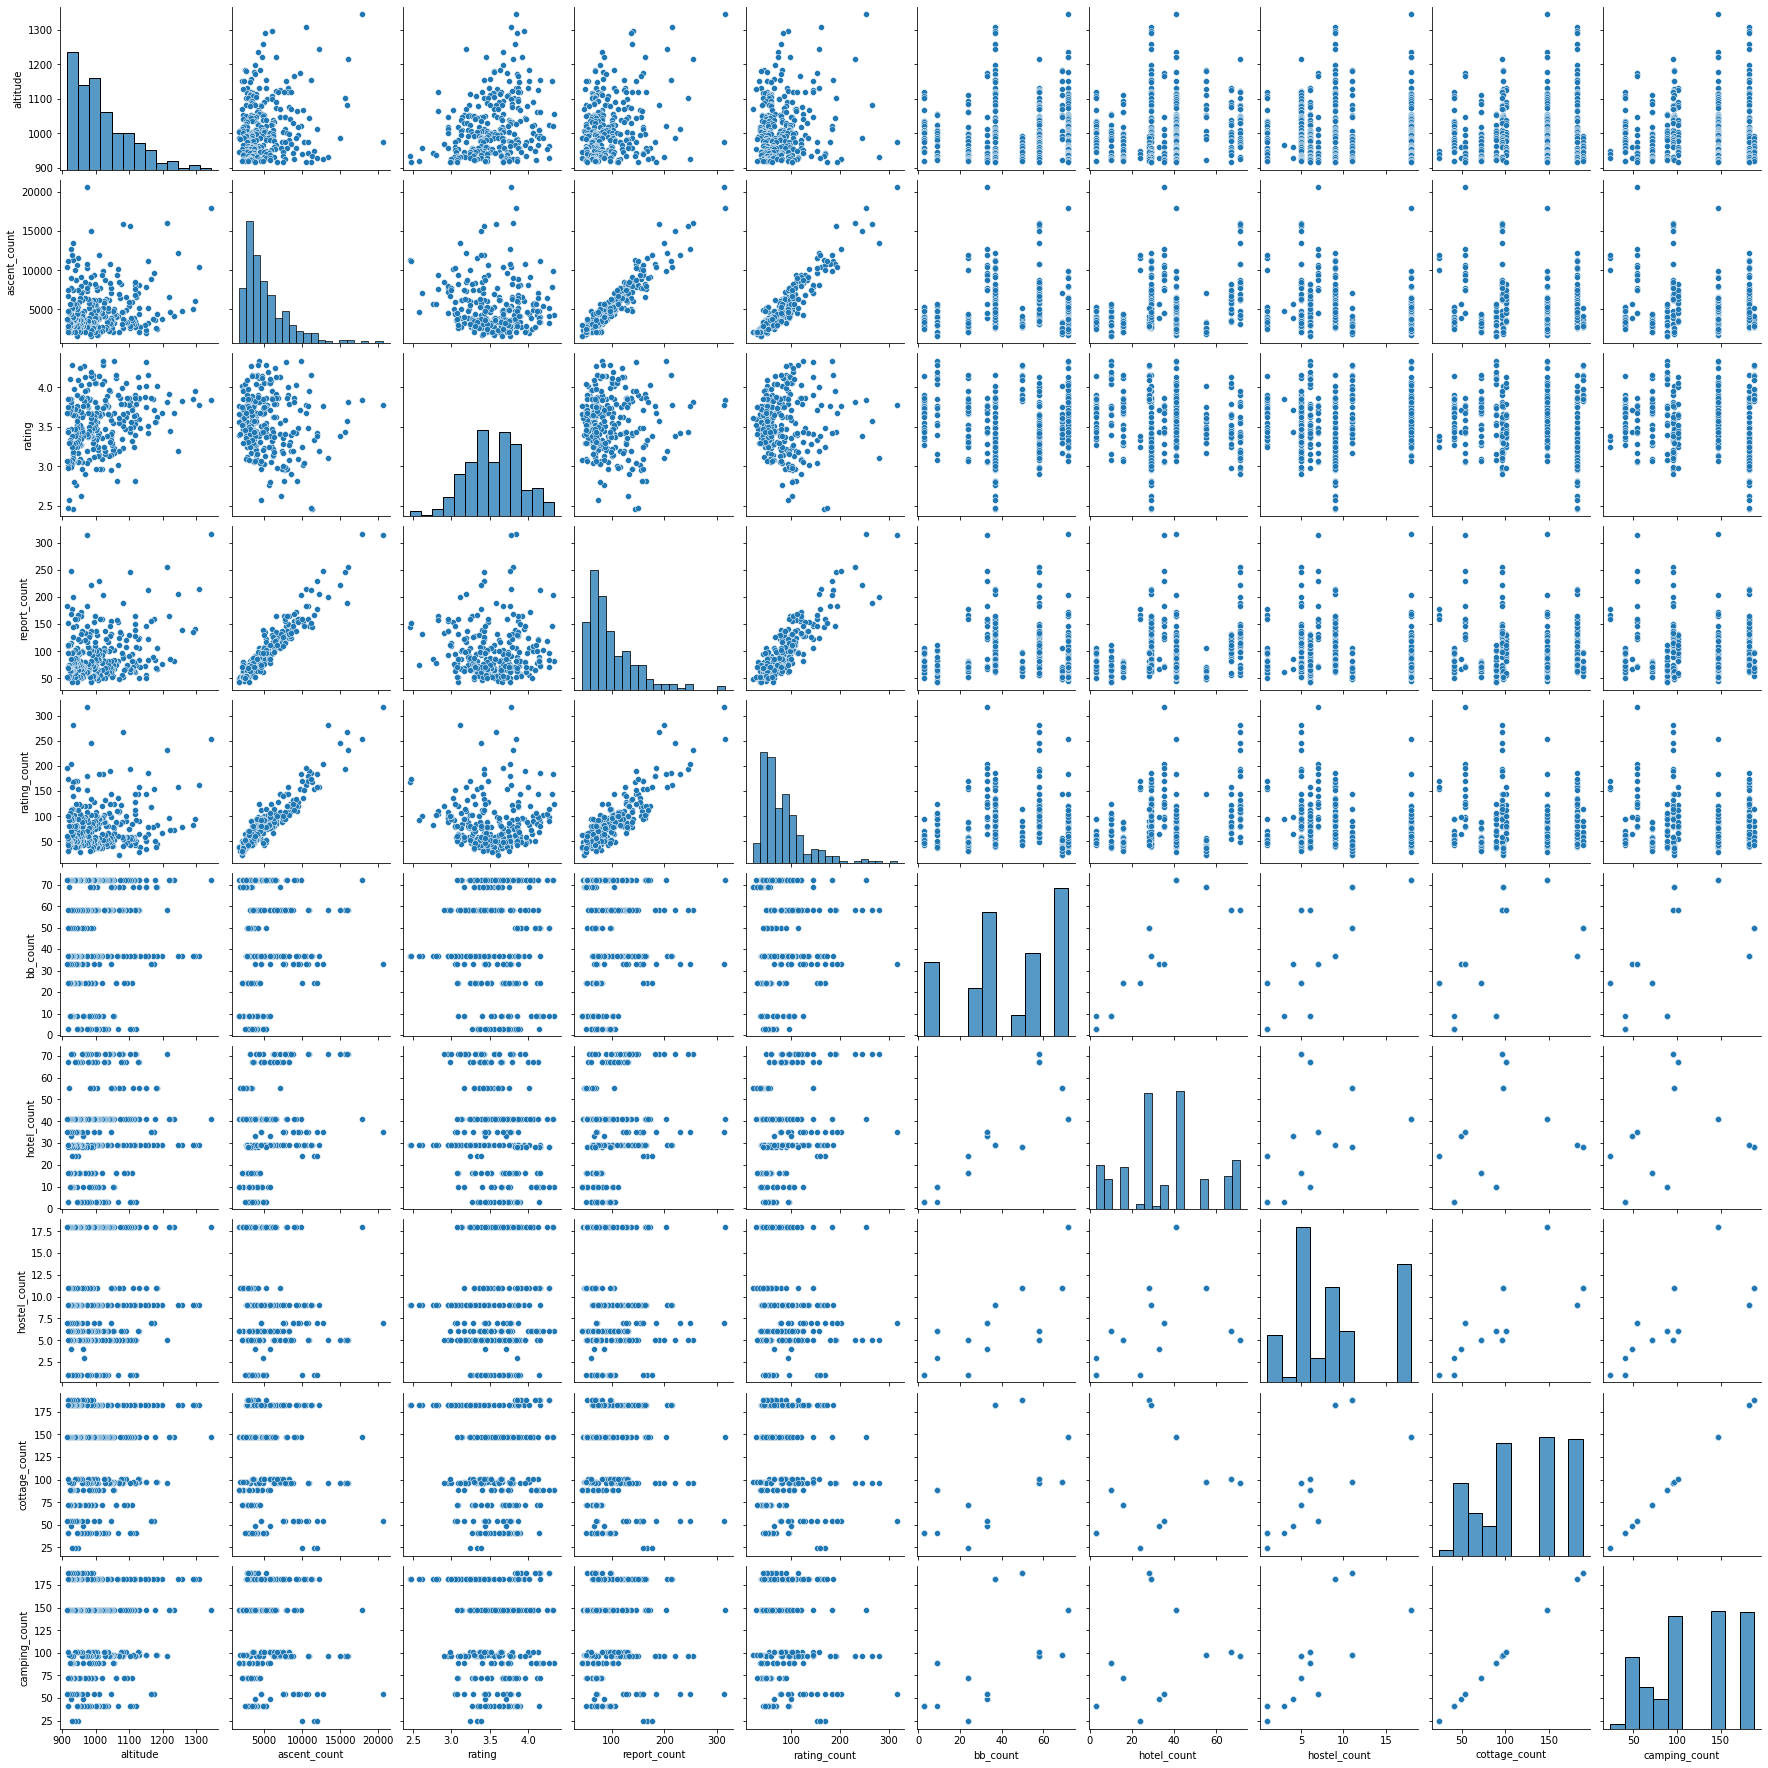

In [4]:
sns.pairplot(df.iloc[:,0:12])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Altitude (m)', ylabel='Density'>

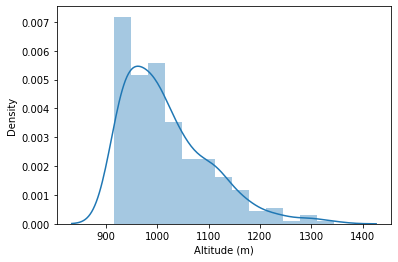

In [5]:
sns.distplot(x=df['altitude'], axlabel='Altitude (m)')

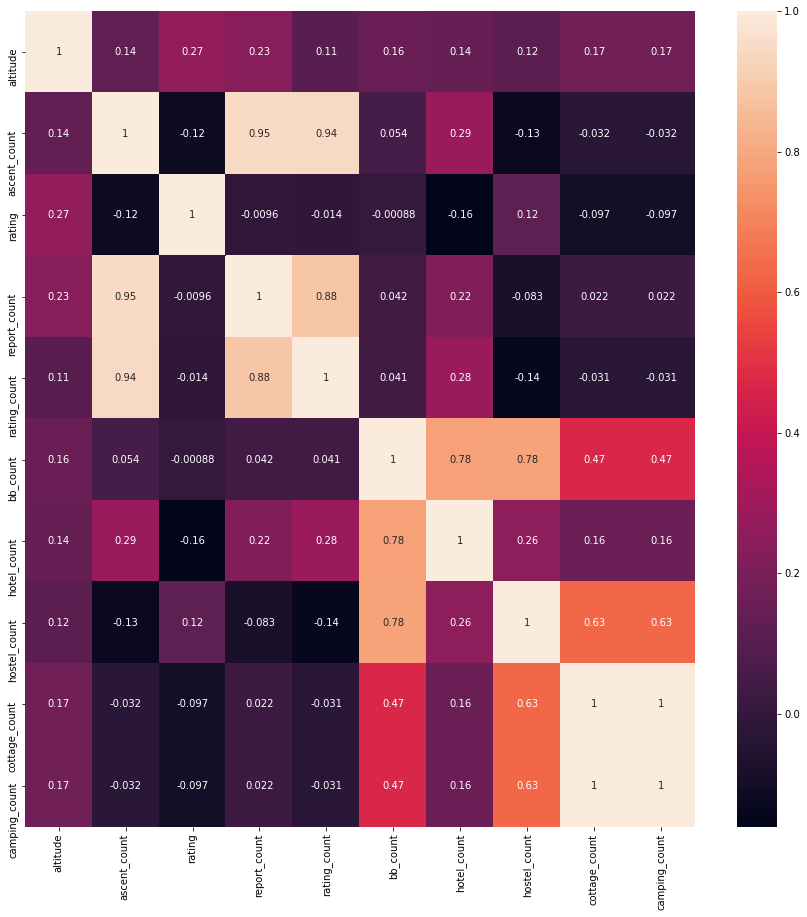

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.iloc[:,0:12].corr(), annot=True)
plt.show()

In [7]:
# gives a very good understanding of how the features are related. Time to implement the prediction model
model = smf.ols('ascent_count ~ altitude', data=df)
results = model.fit()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


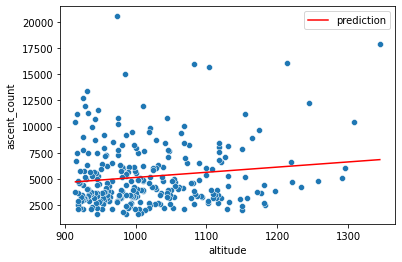

In [8]:
sns.scatterplot(data=df, y='ascent_count', x='altitude')
y_hat = results.predict(df['altitude'])
sns.lineplot(df['altitude'], y_hat, color='r', label='prediction')
plt.legend()
# clearly a very bad prediction

In [9]:
print(results.summary())
# very low r-squared value (not good at all 1.9% info about indep variable)
# p value quite low for altitude (0.021) but not low enough for a strong relation
# need to add more features

                            OLS Regression Results                            
Dep. Variable:           ascent_count   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.351
Date:                Sat, 27 Mar 2021   Prob (F-statistic):             0.0214
Time:                        21:55:58   Log-Likelihood:                -2656.6
No. Observations:                 282   AIC:                             5317.
Df Residuals:                     280   BIC:                             5324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    209.0351   2179.614      0.096      0.9

In [10]:
MSE = results.mse_resid
RMSE = np.sqrt(MSE)
print('Root mean square error: '+str(RMSE))
print('Mean square error: ' + str(MSE))
# very bad again

Root mean square error: 2996.0401558624085
Mean square error: 8976256.615540046


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


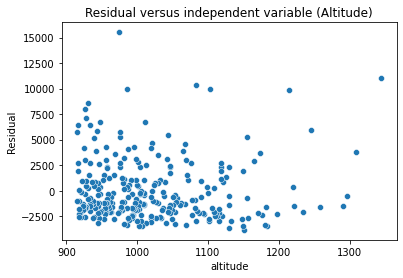

In [11]:
fig, ax = plt.subplots()
ax.set_ylabel('Residual')
ax.set_title('Residual versus independent variable (Altitude)')
scatter = sns.scatterplot(df['altitude'], results.resid)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


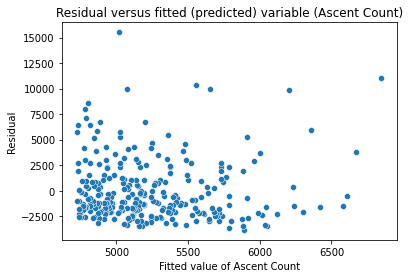

In [12]:
fig, ax = plt.subplots()
ax.set_ylabel('Residual')
ax.set_xlabel('Fitted value of Ascent Count')
ax.set_title('Residual versus fitted (predicted) variable (Ascent Count)')
scatter = sns.scatterplot(y_hat, results.resid)

Very bad regression, not good enough. Will add more feature variables now

In [13]:
df2 = df[:]

In [14]:
df2.insert(loc=len(df.columns), column = 'logAscent', value=df['ascent_count'].apply(np.log))
# df2.insert(loc=len(df.columns), column = 'logAltitude', value=df['altitude'].apply(np.cbrt))
# df2['hello'] = np.log(df['altitude'])**0.5


In [20]:
model = sm.GLM(df['ascent_count'], df['altitude'], family=sm.families.Gamma())
results = model.fit()

/root/venv/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


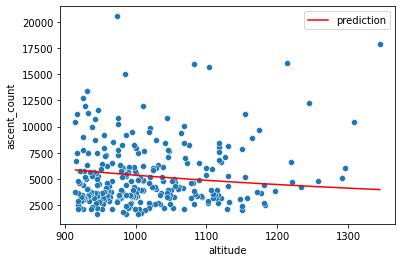

In [22]:
sns.scatterplot(data=df, y='ascent_count', x='altitude')
y_hat = results.predict(df['altitude'])
sns.lineplot(df['altitude'], y_hat, color='r', label='prediction')
# plt.xlim(900, 1200)
# plt.ylim(0, 21000)
plt.legend()
# clearly a very bad prediction

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


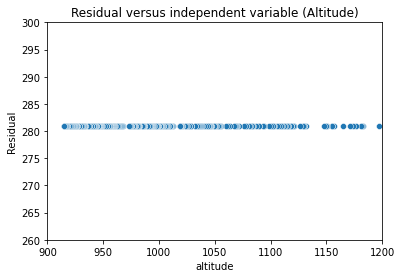

In [23]:
fig, ax = plt.subplots()
ax.set_ylabel('Residual')
ax.set_title('Residual versus independent variable (Altitude)')
scatter = sns.scatterplot(df['altitude'], results.df_resid)
plt.xlim(900, 1200)
plt.ylim(260, 300)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad6e5521-2329-4ba2-9ce8-c0f71fb15c68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>